# Correlation Study : Time Domain  
## Dynamic Time Warping + Eclidean Distance

## 1.0 Import Packages

In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
from scipy.spatial.distance import euclidean
from fastdtw import fastdtw

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

## 2.0 Read Pickle File

In [2]:
def readpickefile(person):
    with open(person+'.pkl', 'rb') as f:
        result1,dfs1 = pickle.load(f)
    return result1,dfs1

Read Pickle file from Person1,2,3,4

In [3]:
result1,dfs1 = readpickefile('person1')
result2,dfs2 = readpickefile('person2')
result3,dfs3 = readpickefile('person3')
result4,dfs4 = readpickefile('person4')
result5,dfs5 = readpickefile('person5')

## 3.0 Segment out distance > 10m or < 3m

In [4]:
def remove_10_3(rotate,angle):
    rot1_3000_10000 = rotate[angle["DST"]>3000]
    rot1_3000_10000 = rot1_3000_10000[ang1["DST"]<10000]
    ang1_3000_10000 = ang1[ang1["DST"]>3000]
    ang1_3000_10000 = ang1_3000_10000[ang1["DST"]<10000]
    return rot1_3000_10000, ang1_3000_10000
    
print("list of bag file/observation point:")
list_bag=list(dfs1.keys())
print(list_bag)
rot1, ang1 = dfs1[list_bag[0]][0]
rot1_3000_10000, ang1_3000_10000=remove_10_3(rot1,ang1)

list of bag file/observation point:
['20210520_222743.bag', '20210520_222920.bag', '20210520_222950.bag', '20210520_223018.bag', '20210520_223044.bag', '20210520_223107.bag', '20210520_223133.bag', '20210520_223224.bag', '20210520_223159.bag', '20210520_223259.bag', '20210520_223324.bag']


In [5]:
print("Observation/Bag File : " + list_bag[0])
print("Rotation Vectors:")
rot1_3000_10000

Observation/Bag File : 20210520_222743.bag
Rotation Vectors:


link                                RSH                           RUA  \
axis                                  X         Y         Z         X   
0 days 00:00:07.273675293           NaN       NaN       NaN       NaN   
0 days 00:00:07.339369141  0.000000e+00 -0.972073 -0.234679 -0.927227   
0 days 00:00:07.406169434 -0.000000e+00  0.996521  0.083344 -0.894439   
0 days 00:00:07.472505371 -4.749160e-01 -0.871492 -0.122294       NaN   
0 days 00:00:07.539643311 -8.922970e-02  0.988490  0.122167       NaN   
0 days 00:00:07.606039307           NaN       NaN       NaN -0.610401   
0 days 00:00:07.672739014           NaN       NaN       NaN -0.850283   
0 days 00:00:07.740284424           NaN       NaN       NaN       NaN   
0 days 00:00:07.805885986           NaN       NaN       NaN       NaN   
0 days 00:00:07.872672363           NaN       NaN       NaN       NaN   
0 days 00:00:07.939533203           NaN       NaN       NaN       NaN   
0 days 00:00:08.007090088  1.137606e-06 -0.996303 -0.085907       NaN   
0 days 00:00:08.072418945  6.839375e-06  0.996303  0.085907       NaN   
0 days 00:00:08.139507568  8.089617e-02 -0.993200 -0.083721       NaN   
0 days 00:00:08.206139648           NaN       NaN       NaN -0.585773   
0 days 00:00:08.273798584           NaN       NaN       NaN       NaN   
0 days 00:00:08.339053467  2.416868e-07 -0.996079 -0.088468       NaN   
0 days 00:00:08.405637207  3.653848e-07 -0.996079 -0.088468       NaN   
0 days 00:00:08.473912354  1.188515e-07  0.996079  0.088469       NaN   
0 days 00:00:08.539446777 -1.117137e-06  0.996079  0.088468       NaN   
0 days 00:00:08.605970947 -1.848107e-02 -0.995675 -0.091051       NaN   
0 days 00:00:08.672714844  1.099764e-01  0.989787  0.090703       NaN   
0 days 00:00:08.740161133           NaN       NaN       NaN       NaN   
0 days 00:00:08.806071289           NaN       NaN       NaN       NaN   
0 days 00:00:08.872623779  1.107848e-02 -0.995278 -0.096430       NaN   
0 days 00:00:08.939595947  6.093457e-01 -0.791510  0.047010       NaN   
0 days 00:00:09.006478516  1.178712e-01  0.972603  0.200372       NaN   
0 days 00:00:09.073266602 -9.666584e-01 -0.122733 -0.224740       NaN   
0 days 00:00:09.139585205  6.622320e-01 -0.748847  0.026015       NaN   
0 days 00:00:09.206613037  3.925613e-01 -0.908974 -0.140220       NaN   
0 days 00:00:09.273417236  2.275932e-01 -0.895328 -0.382871 -0.568940   
0 days 00:00:09.340042969           NaN       NaN       NaN       NaN   
0 days 00:00:09.407517334           NaN       NaN       NaN       NaN   
0 days 00:00:09.473462891           NaN       NaN       NaN       NaN   
0 days 00:00:09.540190918           NaN       NaN       NaN       NaN   
0 days 00:00:09.606664063 -1.465367e-06 -0.993772 -0.111436       NaN   
0 days 00:00:09.674938477           NaN       NaN       NaN -0.827326   
0 days 00:00:09.740438965           NaN       NaN       NaN  0.943775   
0 days 00:00:09.806835449 -2.598771e-03  0.993651  0.112479 -0.963030   
0 days 00:00:09.873595947 -2.476474e-02 -0.987625 -0.154868  0.945870   
0 days 00:00:09.940611572  4.160914e-02  0.988855  0.142952  0.744802   
0 days 00:00:10.007006104  4.912770e-08 -0.992888 -0.119055 -0.898861   
0 days 00:00:10.073691162  4.291127e-01  0.902384 -0.039555       NaN   
0 days 00:00:10.140863037           NaN       NaN       NaN       NaN   
0 days 00:00:10.206984375           NaN       NaN       NaN -0.886234   
0 days 00:00:10.273948975  4.147369e-02  0.991472  0.123542 -0.776080   
0 days 00:00:10.340208496           NaN       NaN       NaN  0.945217   
0 days 00:00:10.407141113           NaN       NaN       NaN -0.121772   
0 days 00:00:10.474054932 -9.781838e-02  0.978186  0.183258 -0.794111   
0 days 00:00:10.540750732 -9.942617e-02  0.994264  0.039416  0.807169   
0 days 00:00:10.608466553  1.722863e-02  0.988475  0.150399 -0.953147   
0 days 00:00:10.674137939  2.230649e-08  0.990255  0.139265  0.062586   
0 days 00:00:10.741309814  2.289699e-03 -0.990344 -0.13861

In [6]:
print("Observation/Bag File : " + list_bag[0])
print("Angle Vectors:")
ang1_3000_10000

Observation/Bag File : 20210520_222743.bag
Angle Vectors:


,DST,RSH,RUA,RLA,LSH,LUA,LLA,RHI,RTH,RCA,LHI,LTH,LCA
0 days 00:00:07.273675293,9708.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.834973,0.964403,NaN,0.983319,1.169580
0 days 00:00:07.339369141,9708.0,1.250178,0.103417,NaN,NaN,NaN,NaN,0.165260,0.822794,0.435789,NaN,0.648120,0.156465
0 days 00:00:07.406169434,9420.5,1.467496,0.544710,0.927784,NaN,NaN,NaN,0.433710,NaN,0.046480,NaN,0.413054,0.353309
0 days 00:00:07.472505371,9565.5,0.087744,NaN,0.994962,NaN,NaN,NaN,NaN,NaN,0.169190,NaN,0.413990,0.120515
0 days 00:00:07.539643311,9420.5,0.443418,NaN,0.091406,NaN,NaN,NaN,NaN,0.243298,0.211062,NaN,0.473932,0.136763
0 days 00:00:07.606039307,9345.5,NaN,0.233731,0.743519,NaN,NaN,NaN,NaN,1.544415,0.187994,NaN,1.403422,0.140258
0 days 00:00:07.672739014,9341.5,NaN,1.404659,NaN,NaN,NaN,NaN,NaN,0.962364,0.214899,NaN,0.286517,0.394388
0 days 00:00:07.740284424,9412.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.325393,0.735236,NaN,0.684424,0.315322
0 days 00:00:07.805885986,9203.0,NaN,NaN,NaN,0.045398,NaN,NaN,NaN,1.040633,0.628639,NaN,0.464637,0.365561
0 days 00:00:07.872672363,9413.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.005780,0.653346,NaN,0.126636,0.243480


## 4.0 Feature Selection and Analysis

### Define Function

In [27]:
def correlation_features_rotate_own(bag_df_rotate):
    #Compute Own first
    column_name=list(bag_df_rotate.columns)
    correlation=[]
    for main_c,sub_c in column_name:
        test1=bag_df_rotate[main_c][sub_c]
        Q1 = test1.quantile(0.25)
        Q3 = test1.quantile(0.75)
        IQR = Q3 - Q1
        test1=test1[test1 > (Q1 - 30 * IQR)]
        test1=test1[test1 < (Q3 + 30 * IQR)]
        a=pd.Series(test1)
        new1=a.interpolate(method='polynomial', order=2)
        new12= list(new1)
        for main_c1,sub_c1 in column_name:
            test2=bag_df_rotate[main_c1][sub_c1]
            Q1 = test2.quantile(0.25)
            Q3 = test2.quantile(0.75)
            IQR = Q3 - Q1
            test2=test2[test2 > (Q1 - 30 * IQR)]
            test2=test2[test2 < (Q3 + 30 * IQR)]
            a=pd.Series(test2)
            new2=a.interpolate(method='polynomial', order=2)
            new22= list(new2)
            x = np.array(new12)
            y = np.array(new22)
            #x = x1[~np.isnan(x1)]
            #y = y1[~np.isnan(x1)]
            #x = x[~np.isnan(y)]
            #y = y[~np.isnan(y)]
            distance, path = fastdtw(x, y, dist=euclidean)
            correlation.append(abs(distance))
    correlation = np.reshape(correlation, (36,36))
    return correlation

def correlation_features_rotate_compare_other(dfs1,dfs2):
    dfs_list1=list(dfs1.keys())
    dfs_list2=list(dfs2.keys())
    correlation=[]
    for rsbag1 in dfs_list1:
            rot1, ang1 = dfs1[rsbag1][0]
            for rsbag2 in dfs_list2:
                rot2, ang2 = dfs2[rsbag2][0]
                rot1_3000_10000 = rot1[ang1["DST"]>3000]
                rot1_3000_10000 = rot1_3000_10000[ang1["DST"]<10000]
                rot2_3000_10000 = rot2[ang2["DST"]>3000]
                rot2_3000_10000 = rot2_3000_10000[ang2["DST"]<10000]
                #Compute Own first
                column_name=list(rot1_3000_10000.columns)
                for main_c,sub_c in column_name:
                    test1=rot1_3000_10000[main_c][sub_c]
                    Q1 = test1.quantile(0.25)
                    Q3 = test1.quantile(0.75)
                    IQR = Q3 - Q1
                    test1=test1[test1 > (Q1 - 30 * IQR)]
                    test1=test1[test1 < (Q3 + 30 * IQR)]
                    a=pd.Series(test1)
                    new1=a.interpolate(method='polynomial', order=2)
                    new12= list(new1)
                    test2=rot2_3000_10000[main_c][sub_c]
                    Q1 = test2.quantile(0.25)
                    Q3 = test2.quantile(0.75)
                    IQR = Q3 - Q1
                    test2=test2[test2 > (Q1 - 30 * IQR)]
                    test2=test2[test2 < (Q3 + 30 * IQR)]
                    a=pd.Series(test2)
                    new2=a.interpolate(method='polynomial', order=2)
                    new22= list(new2)
                    x = np.array(new12)
                    y = np.array(new22)
                    #x = x1[~np.isnan(x1)]
                    #y = y1[~np.isnan(x1)]
                    #x = x[~np.isnan(y)]
                    #y = y[~np.isnan(y)]
                    distance, path = fastdtw(x, y, dist=euclidean)
                    correlation.append(abs(distance))            
    return correlation

def correlation_features_angle_own(bag_df_angle):
    #Compute Own first
    column_name=list(bag_df_angle.columns)
    correlation=[]
    for main_c in column_name:
        test1=bag_df_angle[main_c]
        Q1 = test1.quantile(0.25)
        Q3 = test1.quantile(0.75)
        IQR = Q3 - Q1
        test1=test1[test1 > (Q1 - 30 * IQR)]
        test1=test1[test1 < (Q3 + 30 * IQR)]
        a=pd.Series(test1)
        new1=a.interpolate(method='polynomial', order=2)
        new12= list(new1)
        for main_c1 in column_name:
            test2=bag_df_angle[main_c1]
            Q1 = test2.quantile(0.25)
            Q3 = test2.quantile(0.75)
            IQR = Q3 - Q1
            test2=test2[test2 > (Q1 - 30 * IQR)]
            test2=test2[test2 < (Q3 + 30 * IQR)]
            a=pd.Series(test2)
            new2=a.interpolate(method='polynomial', order=2)
            new22= list(new2)
            x = np.array(new12)
            y = np.array(new22)
            #x = x1[~np.isnan(x1)]
            #y = y1[~np.isnan(x1)]
            #x = x[~np.isnan(y)]
            #y = y[~np.isnan(y)]
            distance, path = fastdtw(x, y, dist=euclidean)
            correlation.append(abs(distance))
    correlation = np.reshape(correlation, (13,13))
    return correlation

def correlation_features_angle_compare_other(dfs1,dfs2):
    dfs_list1=list(dfs1.keys())
    dfs_list2=list(dfs2.keys())
    correlation=[]
    for rsbag1 in dfs_list1:
            rot1, ang1 = dfs1[rsbag1][0]
            for rsbag2 in dfs_list2:
                rot2, ang2 = dfs2[rsbag2][0]
                ang1_3000_10000 = ang1[ang1["DST"]>3000]
                ang1_3000_10000 = ang1_3000_10000[ang1["DST"]<10000]
                ang2_3000_10000 = ang2[ang2["DST"]>3000]
                ang2_3000_10000 = ang2_3000_10000[ang2["DST"]<10000]
                #Compute Own first
                column_name=list(ang1_3000_10000.columns)
                for main_c in column_name:
                    test1=ang1_3000_10000[main_c]
                    Q1 = test1.quantile(0.25)
                    Q3 = test1.quantile(0.75)
                    IQR = Q3 - Q1
                    test1=test1[test1 > (Q1 - 30 * IQR)]
                    test1=test1[test1 < (Q3 + 30 * IQR)]
                    a=pd.Series(test1)
                    new1=a.interpolate(method='polynomial', order=2)
                    new12= list(new1)
                    test2=ang2_3000_10000[main_c]
                    Q1 = test2.quantile(0.25)
                    Q3 = test2.quantile(0.75)
                    IQR = Q3 - Q1
                    test2=test2[test2 > (Q1 - 30 * IQR)]
                    test2=test2[test2 < (Q3 + 30 * IQR)]
                    a=pd.Series(test2)
                    new2=a.interpolate(method='polynomial', order=2)
                    new22= list(new2)
                    x = np.array(new12)
                    y = np.array(new22)
                    #x = x1[~np.isnan(x1)]
                    #y = y1[~np.isnan(x1)]
                    #x = x[~np.isnan(y)]
                    #y = y[~np.isnan(y)]
                    distance, path = fastdtw(x, y, dist=euclidean)
                    correlation.append(abs(distance))            
    return correlation

### 4. 1 Correlation between features in rotation vectors

Run different observation point to observe the correction between features in rotation vectors

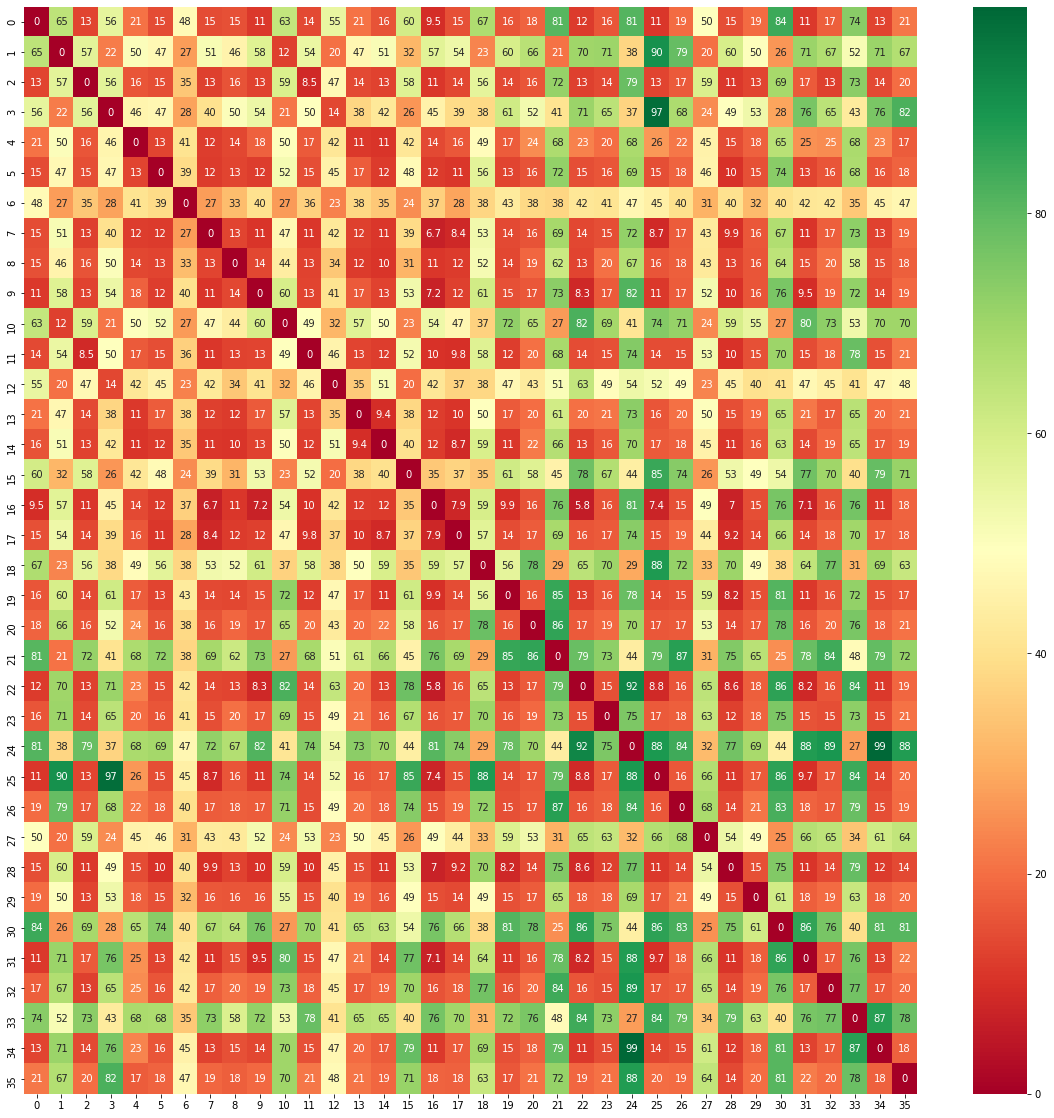

In [28]:
result = correlation_features_rotate_own(rot1_3000_10000)
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(result,annot=True,cmap="RdYlGn")

Run throught the correlation study above, I don't notice any high correlation features that allows us to remove them

### 4. 2 Correlation between features in angle vectors

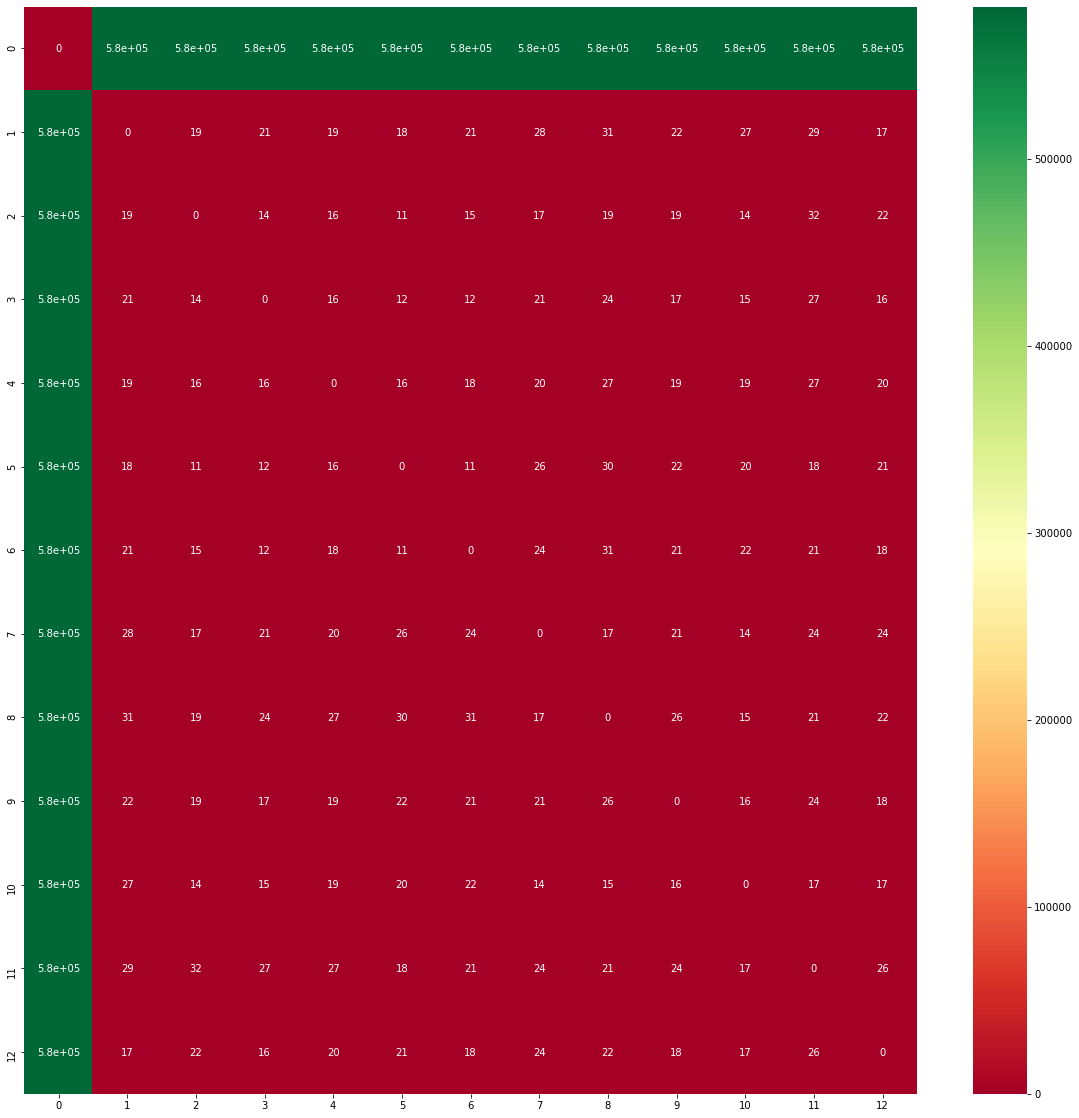

In [29]:
result = correlation_features_angle_own(ang1_3000_10000)
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(result,annot=True,cmap="RdYlGn")

Run throught the correlation study above, I don't notice any high correlation features that allows us to remove them

### 4. 3 Compare the feature correlation (rotation vector) within the same person
For example, we compute the observation1 against the rest of observations in the dataset of same person. We iterate the same way for the rest of observation.

In [30]:
result = correlation_features_rotate_compare_other(dfs1,dfs1)

In [31]:
result = np.reshape(result, (-1,36))
df = pd.DataFrame(result, columns = rot1_3000_10000.columns)
df.style.applymap(lambda x: 'background-color : yellow' if x<10 else '')

In [32]:
drop_list=[i for i, x in enumerate(df['RSH']['X']) if x==0]
df=df.drop(drop_list)
print(df.mean(axis = 0, skipna = True))
print("The summation is "+ str(statistics.mean(df.mean(axis = 0, skipna = True))))

link  axis
RSH   X        7.067781
      Y       24.294613
      Z       10.027024
RUA   X       19.499867
      Y       12.339081
      Z       11.698134
RLA   X       16.891010
      Y        6.869024
      Z        7.390358
LSH   X        6.183014
      Y       19.499469
      Z        9.496193
LUA   X       16.515736
      Y       10.463058
      Z       10.228267
LLA   X       11.931211
      Y        5.949053
      Z        6.352272
RHI   X       27.222724
      Y        8.422196
      Z       16.379753
RTH   X       28.611624
      Y        6.665983
      Z       15.712225
RCA   X       32.854791
      Y       11.574466
      Z       19.521219
LHI   X       21.504440
      Y        7.127300
      Z       16.005787
LTH   X       25.284792
      Y        7.130871
      Z       15.779688
LCA   X       34.413196
      Y       13.959700
      Z       19.726946
dtype: float64
The summation is 15.016468482032698


### 4. 4 Compare the feature (rotation vector) correlation of a person against another person
For example, we compute the each observation from person 1 against all the observations in another person. 

In [33]:
result = correlation_features_rotate_compare_other(dfs1,dfs3)

In [34]:
result = np.reshape(result, (-1,36))
df = pd.DataFrame(result, columns = rot1_3000_10000.columns)
df.style.applymap(lambda x: 'background-color : yellow' if x<10 else '')

In [35]:
drop_list=[i for i, x in enumerate(df['RSH']['X']) if x==0]
df=df.drop(drop_list)
print(df.mean(axis = 0, skipna = True))
print("The summation is "+ str(statistics.mean(df.mean(axis = 0, skipna = True))))

link  axis
RSH   X        5.924657
      Y       23.573842
      Z        9.331876
RUA   X       18.033656
      Y       11.434918
      Z       11.360635
RLA   X       17.718062
      Y        7.586833
      Z        8.180022
LSH   X        5.898107
      Y       20.030201
      Z        8.546379
LUA   X       16.331651
      Y       10.883683
      Z        9.817308
LLA   X       19.131264
      Y        7.896261
      Z        8.048906
RHI   X       22.928083
      Y        8.094009
      Z       14.206738
RTH   X       29.540659
      Y        6.894638
      Z       16.289163
RCA   X       30.640854
      Y       10.881260
      Z       19.460951
LHI   X       20.149312
      Y        7.607223
      Z       14.452563
LTH   X       27.103862
      Y        7.419692
      Z       16.940683
LCA   X       31.768863
      Y       13.392684
      Z       19.413918
dtype: float64
The summation is 14.914261564663825


### 4. 5 Compare the feature correlation (angle vector) within the same person

In [36]:
result = correlation_features_angle_compare_other(dfs1,dfs1)
result = np.reshape(result, (-1,13))
df = pd.DataFrame(result, columns = ang1_3000_10000.columns)
df.style.applymap(lambda x: 'background-color : yellow' if x<10 else '')

,DST,RSH,RUA,RLA,LSH,LUA,LLA,RHI,RTH,RCA,LHI,LTH,LCA
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,53080.500000,20.727780,16.436702,10.204988,8.903987,12.887418,14.338488,10.632674,18.779555,19.474563,11.781032,18.074162,17.955418
2,6959.000000,14.893755,13.159471,13.274843,17.039937,11.396985,13.079740,12.765268,17.815144,17.087026,9.101786,18.167650,21.191501
3,73708.000000,21.569581,11.637425,17.492190,21.950653,13.667444,9.938068,11.454071,21.002243,18.223605,13.941951,19.990540,23.600269
4,8986.500000,16.005856,15.064761,13.630170,19.953020,12.272674,11.303369,15.631040,17.347034,18.533456,14.602275,19.610171,16.394095
5,24714.000000,19.166260,24.311764,12.567441,22.355253,18.017197,7.885703,13.805254,14.363448,14.434618,16.486098,17.786789,26.490292
6,12751.000000,23.544104,27.854404,10.154744,27.599918,15.091545,11.776982,10.574992,16.748713,18.316381,8.882209,19.304657,15.492806
7,23977.000000,18.977998,16.224744,8.762762,14.228667,11.664024,13.588130,9.988212,20.149621,19.548169,11.472578,18.475918,23.840969
8,8525.500000,30.128740,13.001295,9.942521,12.679795,14.897803,8.602226,15.821184,19.458001,15.655949,13.092316,15.915634,16.874382
9,42728.500000,16.310815,11.388882,16.352204,14.502911,12.189201,13.425519,14.789254,19.623934,18.238273,13.047399,18.339552,33.388859


In [37]:
drop_list=[i for i, x in enumerate(df['RSH']) if x==True]
df=df.drop(drop_list)
print(df.mean(axis = 0, skipna = True))
print("The summation is "+ str(statistics.mean(df.mean(axis = 0, skipna = True))))

DST    18044.239669
RSH       16.518987
RUA       10.768232
RLA        9.722498
LSH       15.840332
LUA       10.927618
LLA        8.435693
RHI        8.960292
RTH       15.385504
RCA       14.480389
LHI        9.013569
LTH       14.715555
LCA       16.132355
dtype: float64
The summation is 1399.626207135351


### 4. 6 Compare the feature (angle vector) correlation of a person against another person

In [38]:
result = correlation_features_angle_compare_other(dfs1,dfs2)
result = np.reshape(result, (-1,13))
df = pd.DataFrame(result, columns = ang1_3000_10000.columns)
df.style.applymap(lambda x: 'background-color : yellow' if x<10 else '')

,DST,RSH,RUA,RLA,LSH,LUA,LLA,RHI,RTH,RCA,LHI,LTH,LCA
0,38957.000000,29.074549,13.789570,13.997153,14.878954,11.009230,11.456189,11.918559,17.590638,20.895715,19.722158,31.590628,20.474100
1,14948.500000,21.826130,14.281827,15.275961,15.020269,13.486861,10.217651,14.909783,23.750128,21.396580,16.558593,24.774062,21.853044
2,130634.500000,14.425227,14.294562,11.994425,18.829179,11.346517,10.128085,10.784465,26.716905,22.746342,11.975369,22.606982,28.668009
3,15313.500000,25.955299,13.838613,13.305821,32.215343,10.295956,9.625338,18.948905,21.558540,19.734976,16.381088,28.486185,21.547046
4,11178.000000,20.929042,15.234819,16.300903,18.566338,12.101266,18.508937,11.626684,20.296600,24.038369,15.481456,22.379322,21.937740
5,16296.000000,20.187763,12.158749,17.859235,18.987797,12.018191,10.615050,20.795726,37.009803,22.202159,20.908715,24.655869,30.183297
6,55413.500000,29.919188,9.990601,14.330460,14.308341,10.750818,9.862556,11.368025,35.518192,18.827668,12.621404,40.436726,22.132444
7,26386.000000,34.642996,20.911649,12.806073,16.492375,12.113212,10.284349,14.739332,26.409452,17.041901,13.219153,25.889773,20.808207
8,38654.000000,21.955023,16.327718,12.171271,19.617267,12.097973,12.894264,17.221897,21.002284,24.659186,27.391968,24.404412,25.760618
9,59929.500000,20.408613,14.409750,10.470348,19.979104,16.098417,15.053350,17.420470,32.466259,20.662855,14.837543,27.102408,30.556536


In [39]:
drop_list=[i for i, x in enumerate(df['RSH']) if x==True]
df=df.drop(drop_list)
print(df.mean(axis = 0, skipna = True))
print("The summation is "+ str(statistics.mean(df.mean(axis = 0, skipna = True))))

DST    24574.204545
RSH       20.286794
RUA       11.565149
RLA       12.214025
LSH       18.231398
LUA       11.914714
LLA       10.605936
RHI       12.640416
RTH       21.183221
RCA       19.964672
LHI       14.154902
LTH       23.354849
LCA       21.856280
dtype: float64
The summation is 1905.5520693009055


### 4. 7 Compute Table (Mean Value) from correlation of rotation features
We compute the mean value from the correlation of each observation against all the observation in another person

In [40]:
def correlation_person_rotate(df1,df2,df3,df4,df5):
    list_compute = [df1,df2,df3,df4,df5]
    outcome=[]
    for element1 in list_compute:
         for element2 in list_compute:
                result = correlation_features_rotate_compare_other(element1,element2)
                result = np.reshape(result, (-1,36))
                df = pd.DataFrame(result, columns = rot1_3000_10000.columns)
                drop_list=[i for i, x in enumerate(df['RSH']['X']) if x==1]
                df=df.drop(drop_list)
                x=statistics.mean(df.mean(axis = 0, skipna = True))
                outcome.append(x)
    return outcome
result=correlation_person_rotate(dfs1,dfs2,dfs3,dfs4,dfs5)

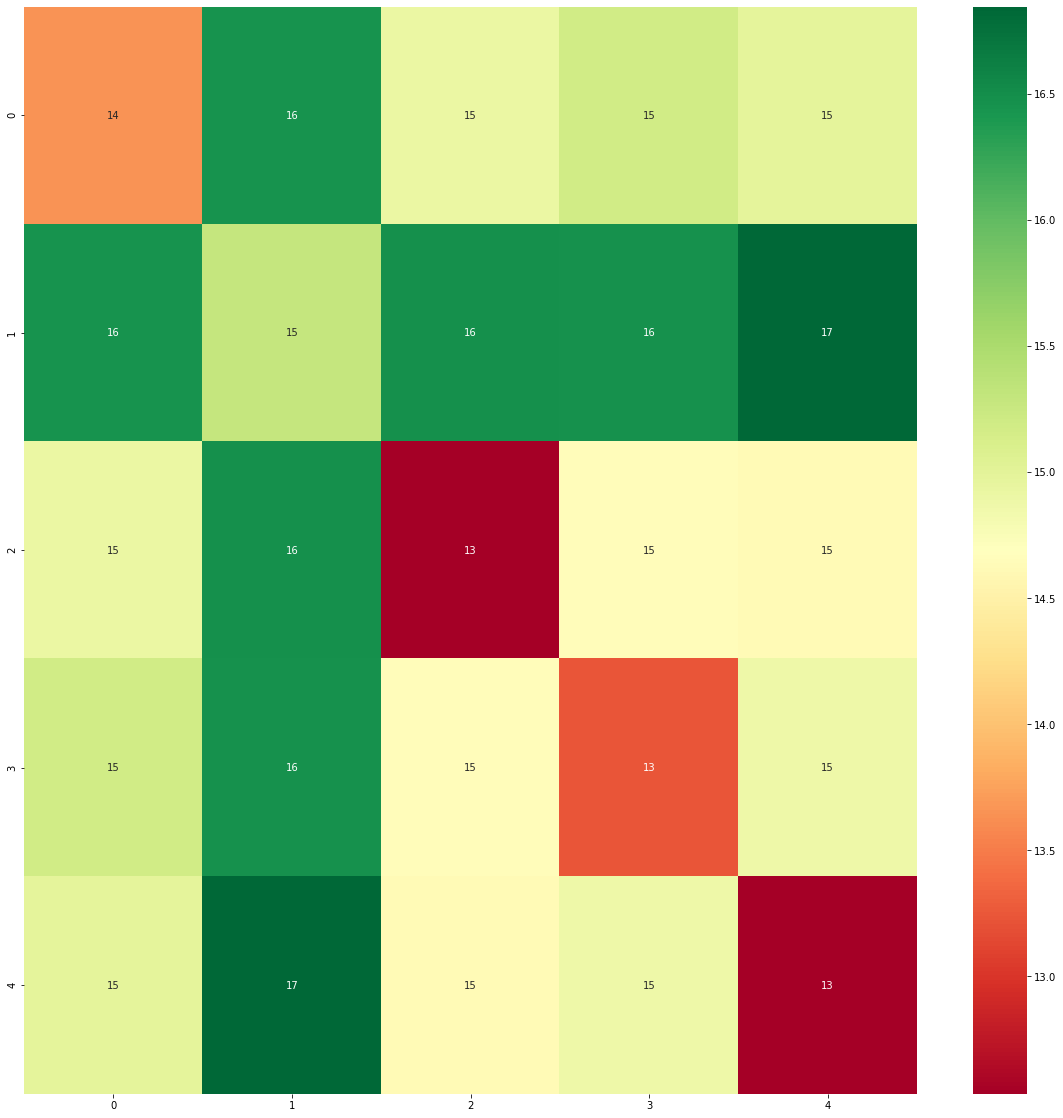

In [41]:
result = np.reshape(result, (-1,5))
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(result,annot=True,cmap="RdYlGn")

### 4. 7 Compute Table (Mean Value) from correlation of angle features
We compute the mean value from the correlation of each observation against all the observation in another person

In [42]:
def correlation_person_angle(df1,df2,df3,df4,df5):
    list_compute = [df1,df2,df3,df4,df5]
    outcome=[]
    for element1 in list_compute:
         for element2 in list_compute:
                result = correlation_features_angle_compare_other(element1,element2)
                result = np.reshape(result, (-1,13))
                df = pd.DataFrame(result, columns = ang1_3000_10000.columns)
                drop_list=[i for i, x in enumerate(df['RSH']) if x==1]
                df=df.drop(drop_list)
                x=statistics.mean(df.mean(axis = 0, skipna = True))
                outcome.append(x)
    return outcome
result=correlation_person_angle(dfs1,dfs2,dfs3,dfs4,dfs5)

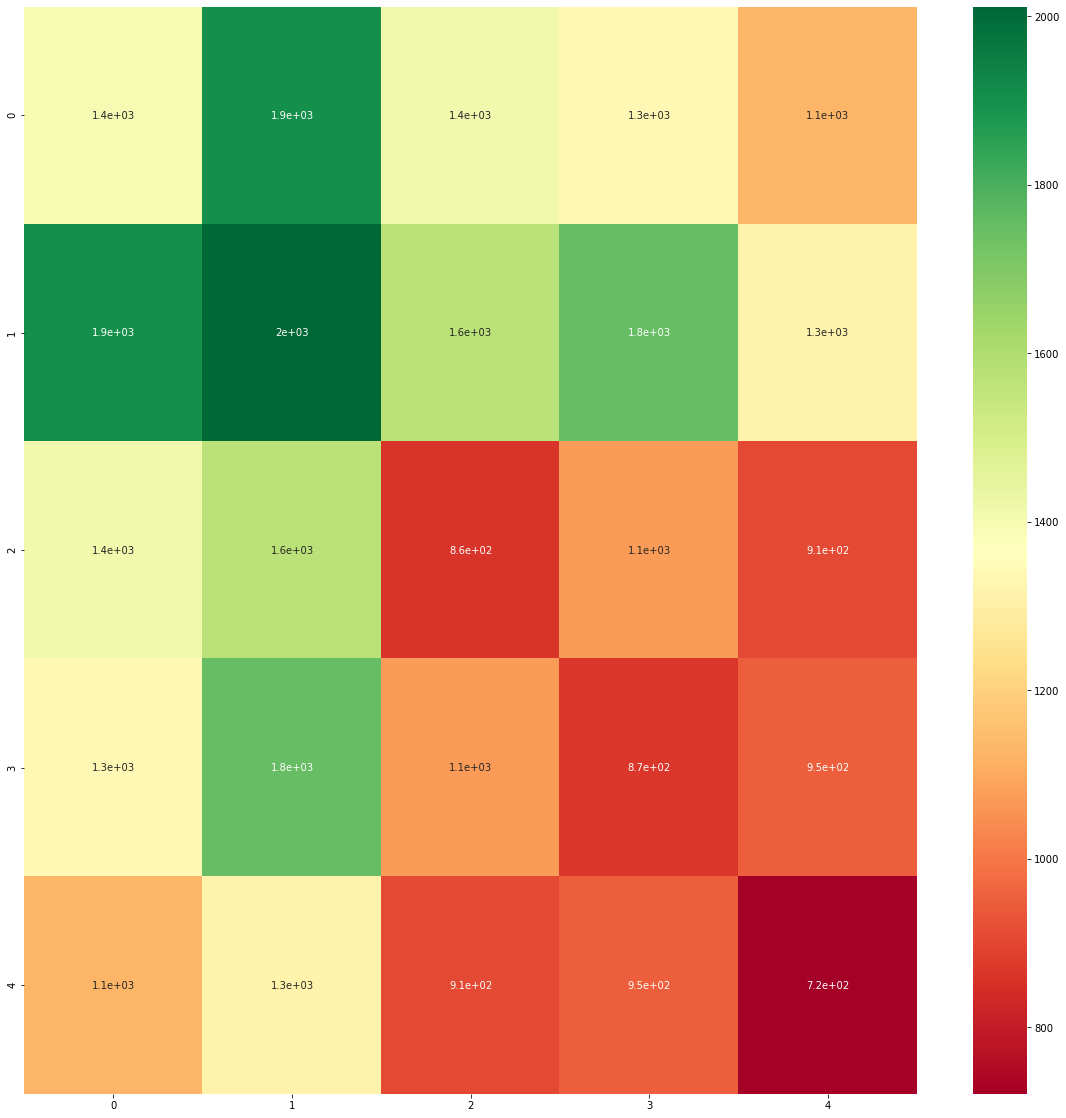

In [43]:
result = np.reshape(result, (-1,5))
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(result,annot=True,cmap="RdYlGn")

## 5.0 Conclusion

In this study, we notice that the correlation of rotation vector could help us to identify the person since it has highest correction to its own other observations. Comparing to angle vectors, the performance of rotation vectors seem will help us get better accuracy.

In next script, we will build a system to identfy the person based on template matching